In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
y, X = iris.target, iris.data[:, :2]
trunc_y, trunc_X = y[np.where(y == 1)[0][0]:] - 1, X[np.where(y == 1)[0][0]:]
#trunc_y, trunc_X = y[:np.where(y == 2)[0][0]], X[:np.where(y == 2)[0][0]]

Imports the iris dataset from scikit-learn. Change the comment between the two data sets to see different fits with different ROC curves

In [2]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=10)
model.fit(trunc_X, trunc_y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Trains a linear SVM on the data

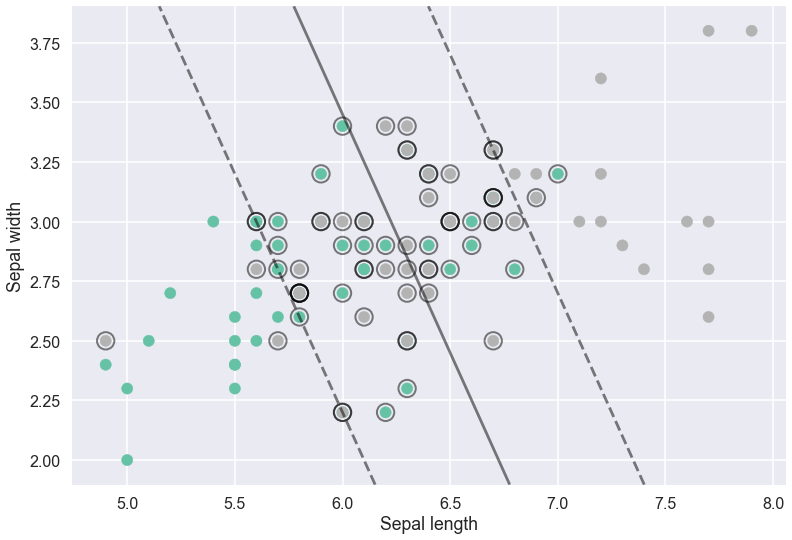

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

plt.scatter(trunc_X[:, 0], trunc_X[:, 1], c=trunc_y, cmap='Set2')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = model.decision_function(xy).reshape(X.shape)
ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1],
           alpha=0.5, linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=300, linewidth=2, edgecolors='k',alpha=0.5, facecolors='none');
plt.show()

Plots the data with the fitted SVM

In [4]:
model.coef_

array([[ 1.60006404,  0.79996342]])

These are the weights of each of the two features, Sepal width and Sepal length in this case

In [5]:
model.decision_function(trunc_X)

array([ 1.40002021,  0.43998179,  1.16001746, -1.72004293,  0.28000282,
       -1.00004841,  0.35997172, -2.60008501,  0.52000557, -1.88007677,
       -2.76006397, -0.52004292, -1.00000725, -0.28002645, -1.08005847,
        0.84000466, -1.00006213, -0.92003835, -0.67999444, -1.40004384,
       -0.36005024, -0.36002279, -0.27999901, -0.36002279,  0.19999276,
        0.60000191,  0.76002203,  0.76000831, -0.44003286, -1.16004109,
       -1.64004659, -1.64004659, -0.92003835, -0.60002554, -1.32007494,
       -0.04005115,  0.84000466, -0.4399917 , -1.00006213, -1.56005024,
       -1.4800539 , -0.20003011, -1.00003469, -2.52007495, -1.24005116,
       -0.84005573, -0.92005207, -0.12002005, -2.20007586, -1.00004841,
        0.35997172, -0.92003835,  1.40003393,  0.03998636,  0.43999551,
        2.20006595, -2.52008867,  1.6400504 ,  0.3600266 ,  2.04001839,
        0.59998819,  0.04000008,  0.92001472, -1.24003744, -0.84004201,
        0.43998179,  0.43999551,  3.00004309,  2.04008699, -1.00

These are the SVM metrics calculated for each data point

In [6]:
test_range = np.arange(np.ceil(np.max(model.decision_function(trunc_X))),
                       np.floor(np.min(model.decision_function(trunc_X))) - 1, -0.05)

Makes a range of cutoff values to plot later

In [7]:
def roc_values(cutoff, trunc_X):
    results = (cutoff < model.decision_function(trunc_X)).astype(int)
    positive = results[trunc_y == 1]
    true_positive = np.sum(positive)/len(positive)
    negative = results[trunc_y == 0]
    false_positive = np.sum(negative)/len(negative)
    return([false_positive, true_positive])

Finds the True positive and False positive rate for each of the cutoff values

In [8]:
to_plot = np.array([roc_values(i, trunc_X) for i in test_range])

Makes a matrix to be plotted

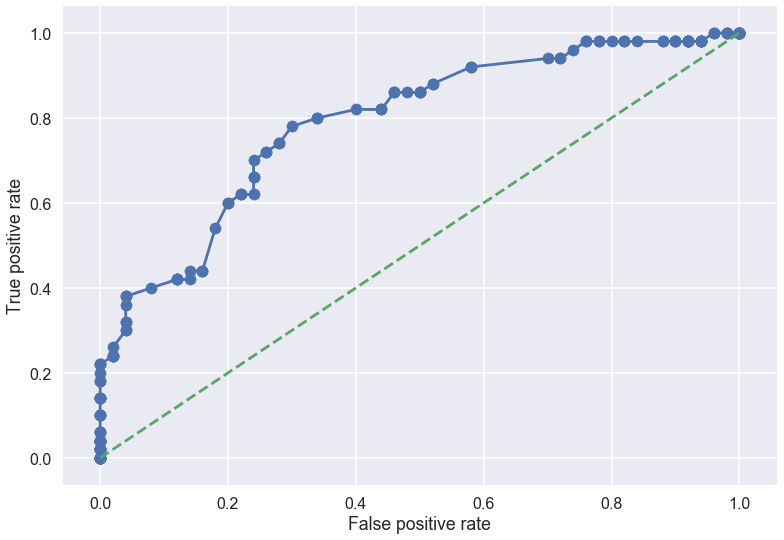

In [9]:
plt.scatter(to_plot[:, 0], to_plot[:, 1])
plt.plot(to_plot[:, 0], to_plot[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

Plots an ROC curve of the fit